In [1]:
from util import setup_notebook
setup_notebook()
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [4]:
failure = pd.read_csv('../output/square@okhttp/experimental/okhttp@optimal-failure.csv')

In [5]:
duration = pd.read_csv('../output/square@okhttp/experimental/okhttp@optimal-failure-duration.csv')

In [10]:
failure_by_job = failure.groupby('travisJobId').groups

In [11]:
duration_by_job = duration.groupby('travisJobId').groups

In [13]:
assert failure_by_job.keys() == duration_by_job.keys()

In [83]:
def rbo(job):
    a = failure.loc[failure_by_job[job]]['testName']
    b = duration.loc[duration_by_job[job]]['testName']
    assert len(a) == len(b)
    result = []
    for index in range(1, len(a) + 1):
        intersection = len(set(a[:index]).intersection(set(b[:index])))
        result.append(intersection / index)
    assert len(result) == len(a)
    return pd.Series(result).median()

In [84]:
some_job = next(iter(failure_by_job.keys()))
print(some_job)
print(rbo(some_job))

2685384
1.0


In [85]:
rbo_values = [(job, rbo(job)) for job in failure_by_job.keys()]
df = pd.DataFrame(rbo_values, columns=['travisJobId', 'rbo'])

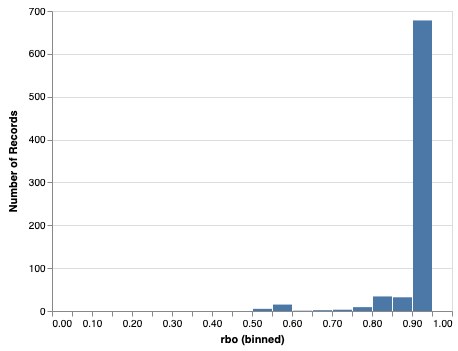

In [88]:
import altair as alt
alt.Chart(df).mark_bar().encode(
    x=alt.X('rbo', bin=alt.BinParams(step=0.05), scale=alt.Scale(domain=[0, 1])),
    y=alt.Y('count()')
)